   CUSTOMER_RATING  EMOTIONAL_INTELLIGENCE  TECHNICAL_KNOWLEDGE  \
0                1                       3                    1   
1                1                       1                    5   
2                3                       1                    2   
3                5                       4                    1   
4                5                       4                    3   

   COMMUNICATION  FOLLOW_UP  DEADLINE  CUSTOMER SATISFACTION  cl  
0              2          2         1               36.33110   0  
1              1          1         1               24.50244   0  
2              3          3         1               46.70366   1  
3              3          2         4               73.64537   2  
4              1          2         3               64.22037   2  
       CUSTOMER_RATING  EMOTIONAL_INTELLIGENCE  TECHNICAL_KNOWLEDGE  \
count     10000.000000            10000.000000         10000.000000   
mean          2.986800                3.010600       

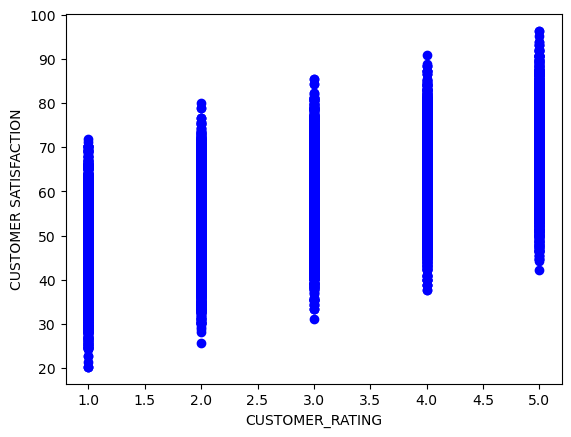

Predicted value (RFC):  2
Accuracy (RFC):  93.48484848484848
Predicted Value For Individual Data:  [3]


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


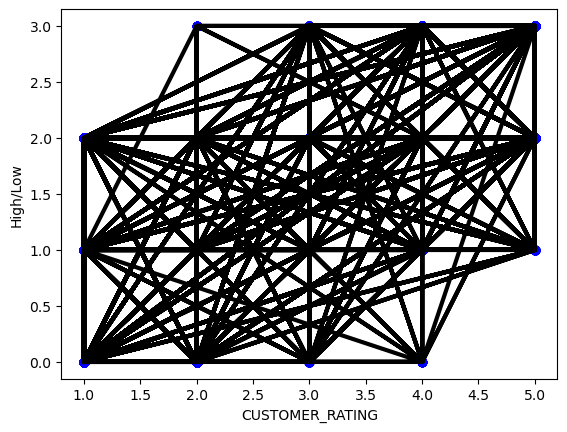

In [1]:
import random
import pandas as pd
 
[w1,w2,w3,w4,w5,w6]=[5.47561,4.42683,1.06,4.73,2.485,2.085]
vals=[]
for i in range(10000):
    x1=random.randint(1,5)#CR
    x2=random.randint(1,5)#EI
    x3=random.randint(1,5)#TK
    x4=random.randint(1,5)#CO
    x5=random.randint(1,3)#FU
    x6=random.randint(1,5)#DBDD
    eq=w1*x1+w2*x2+w3*x3+w4*x4+w5*x5+w6*x6
    cl=0
    if eq<40:
       cl=0
    elif eq<=50 and eq>=40:
       cl=1
    elif eq>=50 and eq<=75:
        cl=2
    elif eq>=75 and eq<=100:
        cl=3
    vals.append([x1,x2,x3,x4,x5,x6,eq,cl])
df=pd.DataFrame(vals,columns=["CUSTOMER_RATING","EMOTIONAL_INTELLIGENCE","TECHNICAL_KNOWLEDGE","COMMUNICATION","FOLLOW_UP","DEADLINE","CUSTOMER SATISFACTION","cl"])
df.to_csv('CRM4.csv',index=False)


from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split


#DATA HANDLING
data = pd.read_csv('CRM4.csv')
print(data.head())
print(data.describe())
X = data[["CUSTOMER_RATING", "EMOTIONAL_INTELLIGENCE",
          "TECHNICAL_KNOWLEDGE", "COMMUNICATION", "FOLLOW_UP", "DEADLINE"]]
Y = data["CUSTOMER SATISFACTION"]
Y_ = data["cl"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y_, test_size=0.33, random_state=42)
plt.scatter(X['CUSTOMER_RATING'], Y, color='b')
plt.xlabel('CUSTOMER_RATING')
plt.ylabel('CUSTOMER SATISFACTION')
plt.show()


mdl = RandomForestClassifier(criterion='entropy',n_estimators=4)
mdl.fit(X_train, y_train)
pred = mdl.predict(X_test)



print("Predicted value (RFC): ", pred[0])
# print("Accuracy (RFC): ", mdl.score(X[:100], Y_[:100])*100)
print("Accuracy (RFC): ", accuracy_score(y_test,pred)*100)

#testing model for individual data
test_pred = mdl.predict(np.array([[5,5,5,5,5,5]]))
#Accuracy for individual data
print("Predicted Value For Individual Data: ", test_pred)

plt.scatter(X['CUSTOMER_RATING'], Y_, color='b')
plt.plot(X['CUSTOMER_RATING'], mdl.predict(X), color='black', linewidth=3)
plt.xlabel('CUSTOMER_RATING')
plt.ylabel('High/Low')
plt.show()